In [85]:
# Первичный отсмотр данных
# импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

## Столбцы:
* school — аббревиатура школы, в которой учится ученик
* sex — пол ученика ('F' - женский, 'M' - мужской)
* age — возраст ученика (от 15 до 22)
* address — тип адреса ученика ('U' - городской, 'R' - за городом)
* famsize — размер семьи('LE3' <= 3, 'GT3' >3)
* Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
* Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
* Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
* Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
* guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
* traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
* studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
* failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
* schoolsup — дополнительная образовательная поддержка (yes или no)
* famsup — семейная образовательная поддержка (yes или no)
* paid — дополнительные платные занятия по математике (yes или no)
* activities — дополнительные внеучебные занятия (yes или no)
* nursery — посещал детский сад (yes или no)
* higher — хочет получить высшее образование (yes или no)
* internet — наличие интернета дома (yes или no)
* romantic — в романтических отношениях (yes или no)
* famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
* freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
* goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
* health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
* absences — количество пропущенных занятий
* score — баллы по госэкзамену по математике

In [86]:
stud_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Цель:
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Провести разведывательный анализ данных и составить отчёт по его результатам в целях дальнейшей разработки моделт, которая предсказывает результаты госэкзамена по математике для каждого ученика школы.

# Задачи:
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

# Решение задачи:

## Вспомогательные функции:

In [68]:
def get_stat_dif(df, column):
    # Функция вычисления статистической разницы в распределении оценок по номинативным признакам, с помощью теста Стьюдента
    
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [80]:
def get_boxplot(df, column):
    # Функция для построения графика номинативных переменных:
    
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data = df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [60]:
def convert_logic_to_num(x):
    
    if pd.isnull(x):
        return x
    
    if x == 'nan':
        return None
    
    if x == 'yes':
        x = 1
    elif x == 'no':
        x = 0
    
    return x

## Основная часть:

In [87]:
# Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [88]:
stud_math.describe(include = ['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [89]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Рассмотрим столбцы по отдельности:

#### 1) Школа:

In [54]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


#### 2) Пол

In [56]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


#### 3) Возраст ученика:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

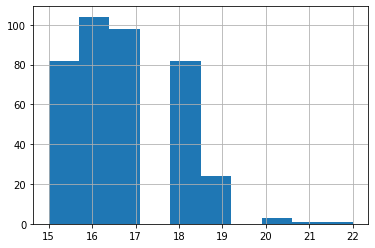

In [57]:
stud_math.age.hist()
stud_math.age.describe()

#### 4) Адрес:

In [58]:
pd.DataFrame(stud_math.address.value_counts())

,address
U,295
R,83


#### 5) Размер семьи:

In [59]:
pd.DataFrame(stud_math.famsize.value_counts())

,famsize
GT3,279
LE3,115


#### 6) Статус совместного проживания родителей:

In [60]:
pd.DataFrame(stud_math.Pstatus.value_counts())

,Pstatus
T,353
A,42


#### 7) Образование родителей: 

In [61]:
# Мать:
pd.DataFrame(stud_math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [68]:
stud_math.Medu.describe()

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [66]:
# Отец:
pd.DataFrame(stud_math.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


In [69]:
stud_math.Fedu.describe()

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

In [90]:
# Удаляем выброс (одно значение 40):
stud_math.Fedu = stud_math.Fedu.replace(40, None)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000057407F0>,
      dtype=object)

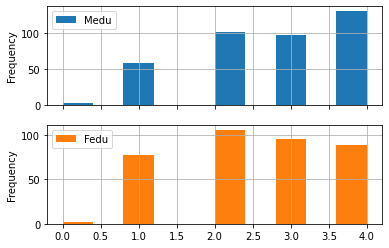

In [3]:
stud_math[['Medu', 'Fedu']].plot(kind = 'hist', 
                               grid = True,
                                subplots = True,
                               legend = True)

#### 8) Работа родителей:

In [76]:
# Мать:
pd.DataFrame(stud_math.Mjob.value_counts())

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [77]:
# Отец:
pd.DataFrame(stud_math.Fjob.value_counts())

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


#### 9) Причина выбора школы:

In [79]:
pd.DataFrame(stud_math.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


#### 10) Опекун: 

In [80]:
pd.DataFrame(stud_math.guardian.value_counts()) 

,guardian
mother,250
father,86
other,28


#### 11) Время в пути до школы:

In [81]:
stud_math.traveltime.describe()

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [84]:
#stud_math.traveltime.value_counts()
pd.DataFrame(stud_math.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


#### 12) Время на учёбу помимо школы в неделю:

In [85]:
pd.DataFrame(stud_math.studytime.value_counts())

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


#### 13) failures — количество внеучебных неудач

In [86]:
pd.DataFrame(stud_math.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

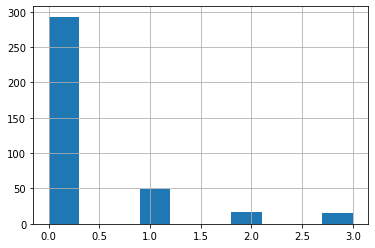

In [87]:
stud_math.failures.hist()
stud_math.failures.describe()

#### 14) Логические переменные:

In [91]:
# дополнительная образовательная поддержка
display(pd.DataFrame(stud_math.schoolsup.value_counts()))

# семейная образовательная поддержка
display(pd.DataFrame(stud_math.famsup.value_counts()))

# дополнительные платные занятия по математике
display(pd.DataFrame(stud_math.paid.value_counts()))

# дополнительные внеучебные занятия
display(pd.DataFrame(stud_math.activities.value_counts()))

# посещал детский сад
display(pd.DataFrame(stud_math.nursery.value_counts()))

# хочет получить высшее образование
display(pd.DataFrame(stud_math.higher.value_counts()))

# наличие интернета дома
display(pd.DataFrame(stud_math.internet.value_counts()))

# в романтических отношениях
display(pd.DataFrame(stud_math.romantic.value_counts()))

,schoolsup
no,335
yes,51


,famsup
yes,219
no,137


,paid
no,200
yes,155


,activities
yes,195
no,186


,nursery
yes,300
no,79


,higher
yes,356
no,19


,internet
yes,305
no,56


,romantic
no,240
yes,124


In [92]:
# Преобразуем в цифровой формат для наилучшего анализа:
stud_math.schoolsup = stud_math.schoolsup.apply(lambda x: False if x == 'no' else True)

stud_math.famsup = stud_math.famsup.apply(convert_logic_to_num).sort_values()

for col in ['paid', 'activities', 'nursery', 'higher', 'famsup', 'internet', 'romantic']:
    stud_math[col] = stud_math[col].apply(convert_logic_to_num).sort_values()

In [93]:
# дополнительная образовательная поддержка
display(pd.DataFrame(stud_math.schoolsup.value_counts()))

# семейная образовательная поддержка
display(pd.DataFrame(stud_math.famsup.value_counts()))

# дополнительные платные занятия по математике
display(pd.DataFrame(stud_math.paid.value_counts()))

# дополнительные внеучебные занятия
display(pd.DataFrame(stud_math.activities.value_counts()))

# посещал детский сад
display(pd.DataFrame(stud_math.nursery.value_counts()))

# хочет получить высшее образование
display(pd.DataFrame(stud_math.higher.value_counts()))

# наличие интернета дома
display(pd.DataFrame(stud_math.internet.value_counts()))

# в романтических отношениях
display(pd.DataFrame(stud_math.romantic.value_counts()))

,schoolsup
False,335
True,60


,famsup
1.0,219
0.0,137


,paid
0.0,200
1.0,155


,activities
1.0,195
0.0,186


,nursery
1.0,300
0.0,79


,higher
1.0,356
0.0,19


,internet
1.0,305
0.0,56


,romantic
0.0,240
1.0,124


#### 15) Семейные отношения:

In [93]:
pd.DataFrame(stud_math.famrel.value_counts())

,famrel
4.0,183
5.0,99
3.0,62
2.0,17
1.0,7


In [94]:
# Удаляем выброс (одно значение -1):
stud_math.famrel = stud_math.famrel.replace(-1, None)

count    368.000000
mean       3.951087
std        0.890641
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

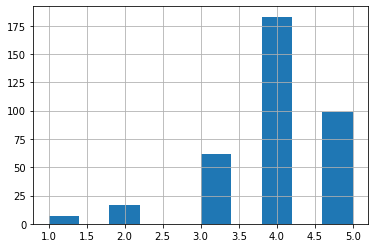

In [94]:
stud_math.famrel.hist()
stud_math.famrel.describe()

#### 16) Свободное время после школы:

In [95]:
pd.DataFrame(stud_math.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

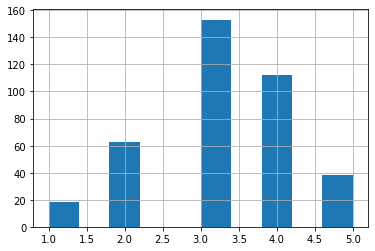

In [96]:
stud_math.freetime.hist()
stud_math.freetime.describe()

#### 17) Проведение времени с друзьями:

In [97]:
pd.DataFrame(stud_math.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

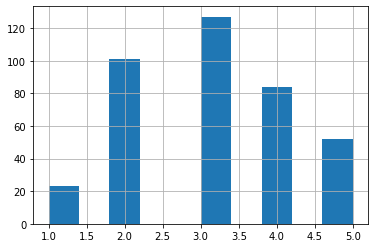

In [98]:
stud_math.goout.hist()
stud_math.goout.describe()

#### 18) Текущее состояние здоровья:

In [99]:
pd.DataFrame(stud_math.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

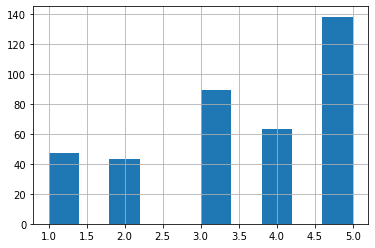

In [100]:
stud_math.health.hist()
stud_math.health.describe()

#### 19) Количество пропущенных занятий:

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

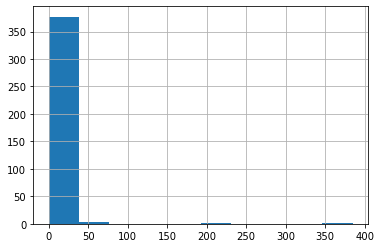

In [102]:
stud_math.absences.hist()
stud_math.absences.describe()

### Выясним, какие столбцы коррелируют с оценкой:

In [95]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,-0.220123,-0.159311,-0.030502,-0.110231,-0.106453,0.015556,-0.207837,-0.108964,0.144440,0.063431,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.060172,0.207429,0.178744,0.106883,0.188484,-0.078589,0.176596,0.208719,0.023870,-0.020986,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,0.041677,0.219144,0.101455,0.113534,0.162113,-0.012896,0.187323,0.133716,0.010062,-0.031142,-0.025892,0.042663,0.023862,0.022572,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.032615,-0.020651,-0.044878,-0.002043,-0.046749,0.102206,-0.082866,-0.086334,0.022876,-0.028303,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,-0.010677,0.129236,0.201447,0.110905,0.083487,-1.000000,0.174532,0.063471,0.055469,0.028655,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,0.014031,-0.093340,-0.178898,-0.091205,-0.111398,0.178992,-0.282585,-0.065367,0.095931,0.012337,0.098382,0.120914,0.081284,0.057391,-0.344338
schoolsup,-0.220123,-0.060172,0.041677,-0.032615,-0.010677,0.014031,1.000000,0.081917,-0.040762,0.028435,0.059093,0.010677,0.065191,-0.052552,-0.044288,-0.035568,-0.045830,-0.033868,-0.040867,0.099849,-0.090244
famsup,-0.159311,0.207429,0.219144,-0.020651,0.129236,-0.093340,0.081917,1.000000,0.312699,-0.007412,0.064869,-0.129236,0.124554,0.098795,0.015542,0.000999,-0.004149,-0.040759,0.030130,0.065217,-0.007540
paid,-0.030502,0.178744,0.101455,-0.044878,0.201447,-0.178898,-0.040762,0.312699,1.000000,0.019044,0.121350,-0.201447,0.197203,0.174581,0.049475,0.000534,-0.065099,0.032648,-0.080834,-0.015179,0.099878
activities,-0.110231,0.106883,0.113534,-0.002043,0.110905,-0.091205,0.028435,-0.007412,0.019044,1.000000,-0.006010,-0.110905,0.099606,0.060126,-0.032455,0.049632,0.074122,0.045012,0.027280,-0.079675,0.010825


In [74]:
# удаляем столбец 20, считаем, что не нужен для дальнейшего анализа (см. вывод 15):
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)
#stud_math.rename(columns={stud_math.columns[20]: "studytime"})

In [75]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   395 non-null    bool   
 16  famsup      356 non-null    float64
 17  paid        355 non-null    float64
 18  activities  381 non-null    float64
 19  nursery     379 non-null    f

In [70]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(stud_math, col)

Найдены статистически значимые различия для колонки Mjob


L:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


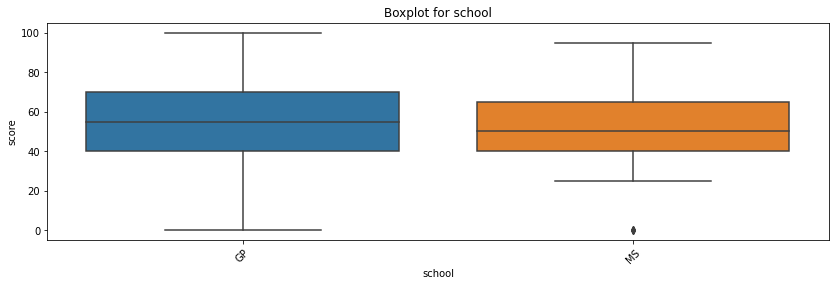

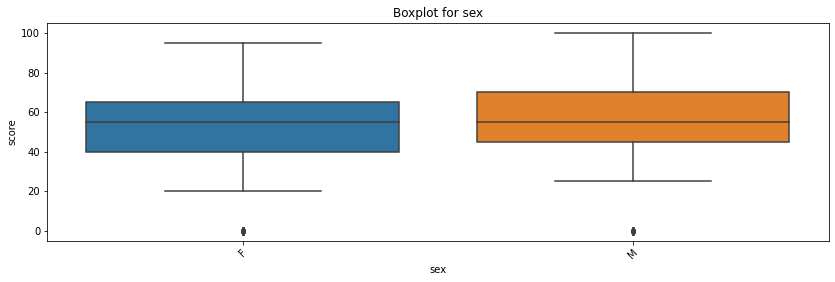

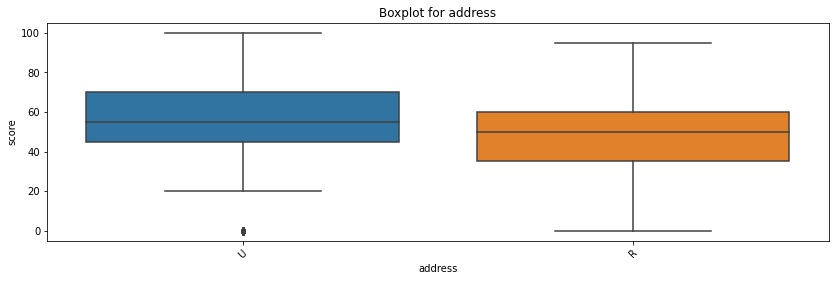

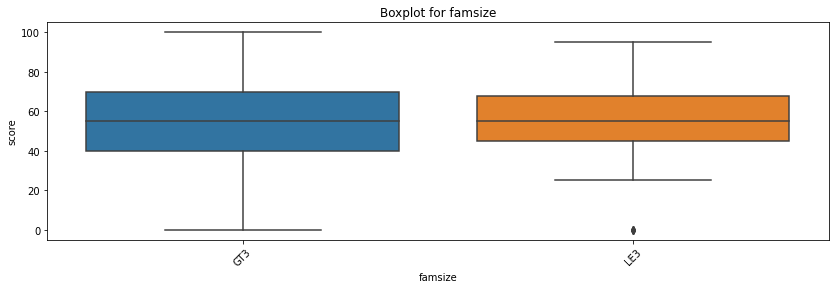

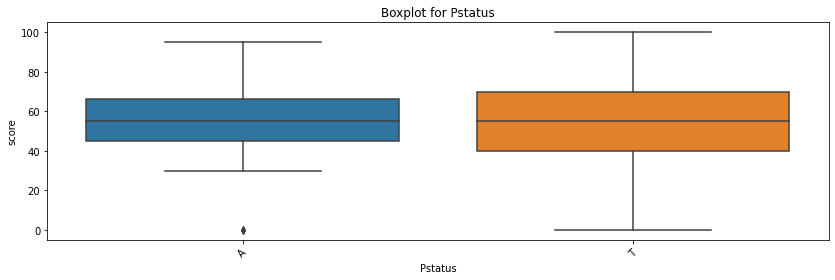

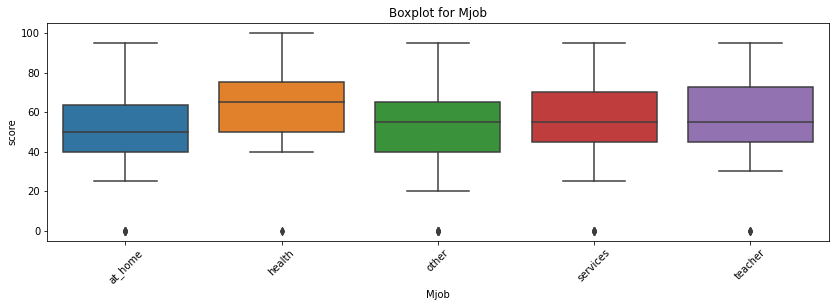

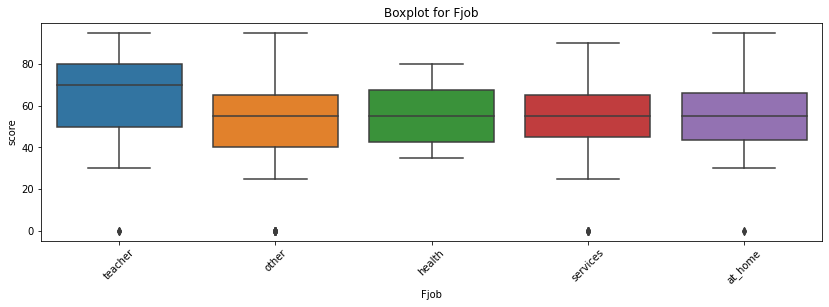

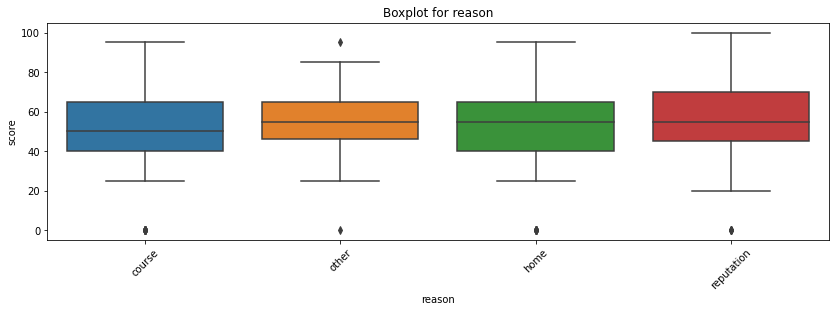

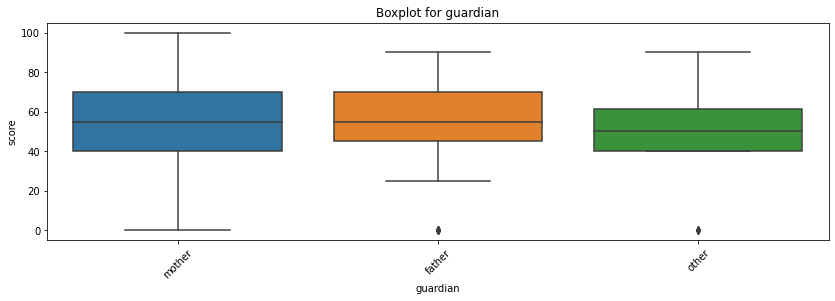

In [81]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(stud_math, col)

In [84]:
# Дополнительно проверим переменную reason:
def convert_reason_to_num(x):
    # 'home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое
    
    if pd.isnull(x):
        return x
    
    if x == 'nan':
        return None
    
    if x == 'home':
        x = 0
    elif x == 'reputation':
        x = 1
    elif x == 'course':
        x = 2
    elif x == 'other':
        x = 3
    
    return x

stud_math.reason = stud_math.reason.apply(convert_new).sort_values()
stud_math[['reason', 'score']].corr()

,reason,score
reason,1.000000,0.002009
score,0.002009,1.000000


### Итог:

In [96]:
#  Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку:
data_for_model = stud_math.loc[:, ['Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences', 
                                   'paid', 'activities', 'nursery', 'higher', 'internet', 
                                   'Mjob', 'Fjob',
                                  'score']]
data_for_model.head()

,Medu,Fedu,studytime,famrel,freetime,absences,paid,activities,nursery,higher,internet,Mjob,Fjob,score
0,4.0,4.0,2.0,4.0,3.0,6.0,0.0,0.0,1.0,1.0,NaN,at_home,teacher,30.0
1,1.0,1.0,2.0,5.0,3.0,4.0,0.0,0.0,0.0,1.0,1.0,at_home,other,30.0
2,1.0,1.0,2.0,4.0,3.0,10.0,NaN,0.0,1.0,1.0,1.0,at_home,other,50.0
3,4.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,health,NaN,75.0
4,3.0,3.0,2.0,4.0,3.0,4.0,1.0,0.0,1.0,1.0,0.0,other,other,50.0


In [97]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Medu        392 non-null    float64
 1   Fedu        371 non-null    float64
 2   studytime   388 non-null    float64
 3   famrel      368 non-null    float64
 4   freetime    384 non-null    float64
 5   absences    383 non-null    float64
 6   paid        355 non-null    float64
 7   activities  381 non-null    float64
 8   nursery     379 non-null    float64
 9   higher      375 non-null    float64
 10  internet    361 non-null    float64
 11  Mjob        376 non-null    object 
 12  Fjob        359 non-null    object 
 13  score       389 non-null    float64
dtypes: float64(12), object(2)
memory usage: 43.3+ KB


# Выводы:
1. В выборке участвуют всего 2 школы, в основном школа GP.
2. По возрастам можно выделить 3 группы учеников: 15-17 лет (основная группа), 18-19, 20-22 (меньшинство).
3. Городских учеников в выборке намного больше (3.5 раза).
4. Размер семьи представлен всего 2 категориями. 
5. В выборке участвуют в основном полные семьи.
6. Слишком много невыделенных в отдельные категории типов работы родителей, что будет влиять на результаты анализа.
7. Категория Опекун по значениям конфликтует с Статусом совместного проживания родителей.
8. В основном ученики живут рядом со школой (0-30 мин).
9. В основном ученики без доп. образовательной поддержки.
10. В выборке в основном ученики, посещавшие детский сад.
11. Почти все ученики хотят получить высшее образование.
12. У большинства есть интернет.
13. В основном у учеников есть свободное время после школы.
14. В основном ученики проводят свободное время с друзьями.
15. Данные довольно чистые, почти нет выбросов.
16. Данные довольно заполненные, почти нет пропусков.
17. Логические данные 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'famsup', 'internet', 'romantic' удобнее преобразовать в числовой формат.
18. Столбцы "studytime" и "studytime, granular" имеют инвертированные знач. коэфф. корреляции по отношению к остал. переменным. Один из этих столбцов следует исключить. Пусть это будет "studytime, granular", т.к. его коэффициент корреляции с score = -0.115741, и для его значений нет описания. 
19. Значения failures количества внеучебных неудач меньше всего коррелируют с score баллами по госэкзамену, поэтому исключаем из данных для дальнейшей модели.
20. Значения age возраста ученика мало влияет на score баллами, да и вообще не может считаться фактором, влияющим на условия жизни учащихся. Этот параметр можно исключить.
21. Переменная 'reason' слабо коррелирует с итоговой оценкой, хотя изначально кажется важным параметром, все-таки исключим этот параметр.
22. Итого, из числовых параметров будем использовать 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences', 'paid', 'activities', 'nursery', 'higher', 'internet' поскольку их коэффициент корреляции со score положителен.
23. Из номинативных параметров возьмем 'Mjob', 'Fjob'.
24. Итого, из дальнейшего анализа исключим 14 параметров: 'studytime, granular', 'age', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'romantic', 'goout',	'health'.
25. Итого, значимыми параметрами для дальнейшего анализа признаны 13 параметров из 28: 'Medu', 'Fedu', 'studytime', 'famrel', 'freetime', 'absences', 'paid', 'activities', 'nursery', 'higher', 'internet', 'Mjob', 'Fjob'. При этом уровень образования родителей и планы получения высшего образования показывают наибольшее влияение на оценку.